<a href="https://colab.research.google.com/github/opeokupe/capstone-ai-ml/blob/main/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Churn Rate Analysis & Data Preprocessing

## Imperial College Capstone Project


In [4]:
# 1. Initial Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the data
train_url = 'https://raw.githubusercontent.com/opeokupe/capstone-ai-ml/main/data/train.csv'
test_url = 'https://raw.githubusercontent.com/opeokupe/capstone-ai-ml/main/data/test.csv'
train_data = pd.read_csv(train_url, on_bad_lines='skip')
test_data = pd.read_csv(test_url, on_bad_lines='skip' )

# 2. Initial Data Exploration
## 2.1 Basic Data Overview

In [2]:


def explore_data(df, title="Dataset"):
    """
    Performs initial exploration of the dataset
    """
    print(f"\n{title} Exploration:")
    print("-" * 50)
    print(f"Shape: {df.shape}")
    print("\nFirst few rows:")
    print(df.head())
    print("\nData Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nBasic Statistics:")
    print(df.describe())



### Explore training data

In [12]:

explore_data(train_data, "Training Dataset")


Training Dataset Exploration:
--------------------------------------------------
Shape: (36992, 25)

First few rows:
                            customer_id              Name  age gender  \
0      fffe4300490044003600300030003800   Pattie Morrisey   18      F   
1  fffe43004900440032003100300035003700       Traci Peery   32      F   
2      fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3  fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4  fffe43004900440031003900350030003600      Meghan Kosak   31      F   

  security_no region_category  membership_category joining_date  \
0     XW0DQ7H         Village  Platinum Membership   2017-08-17   
1     5K0N3X1            City   Premium Membership   2017-08-28   
2     1F2TCL3            Town        No Membership   2016-11-11   
3     VJGJ33N            City        No Membership   2016-10-29   
4     SVZXCWB            City        No Membership   2017-09-12   

  joined_through_referral referral_id  .


## 2.2 Data Distribution Analysis

Analyzes and plots distributions of numerical features

In [14]:


def analyze_distributions(df):
    """
    Analyzes and plots distributions of numerical features
    :param df: DataFrame
    """
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

    plt.figure(figsize=(15, len(numerical_cols)*4))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(len(numerical_cols), 2, i*2-1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')

        plt.subplot(len(numerical_cols), 2, i*2)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()



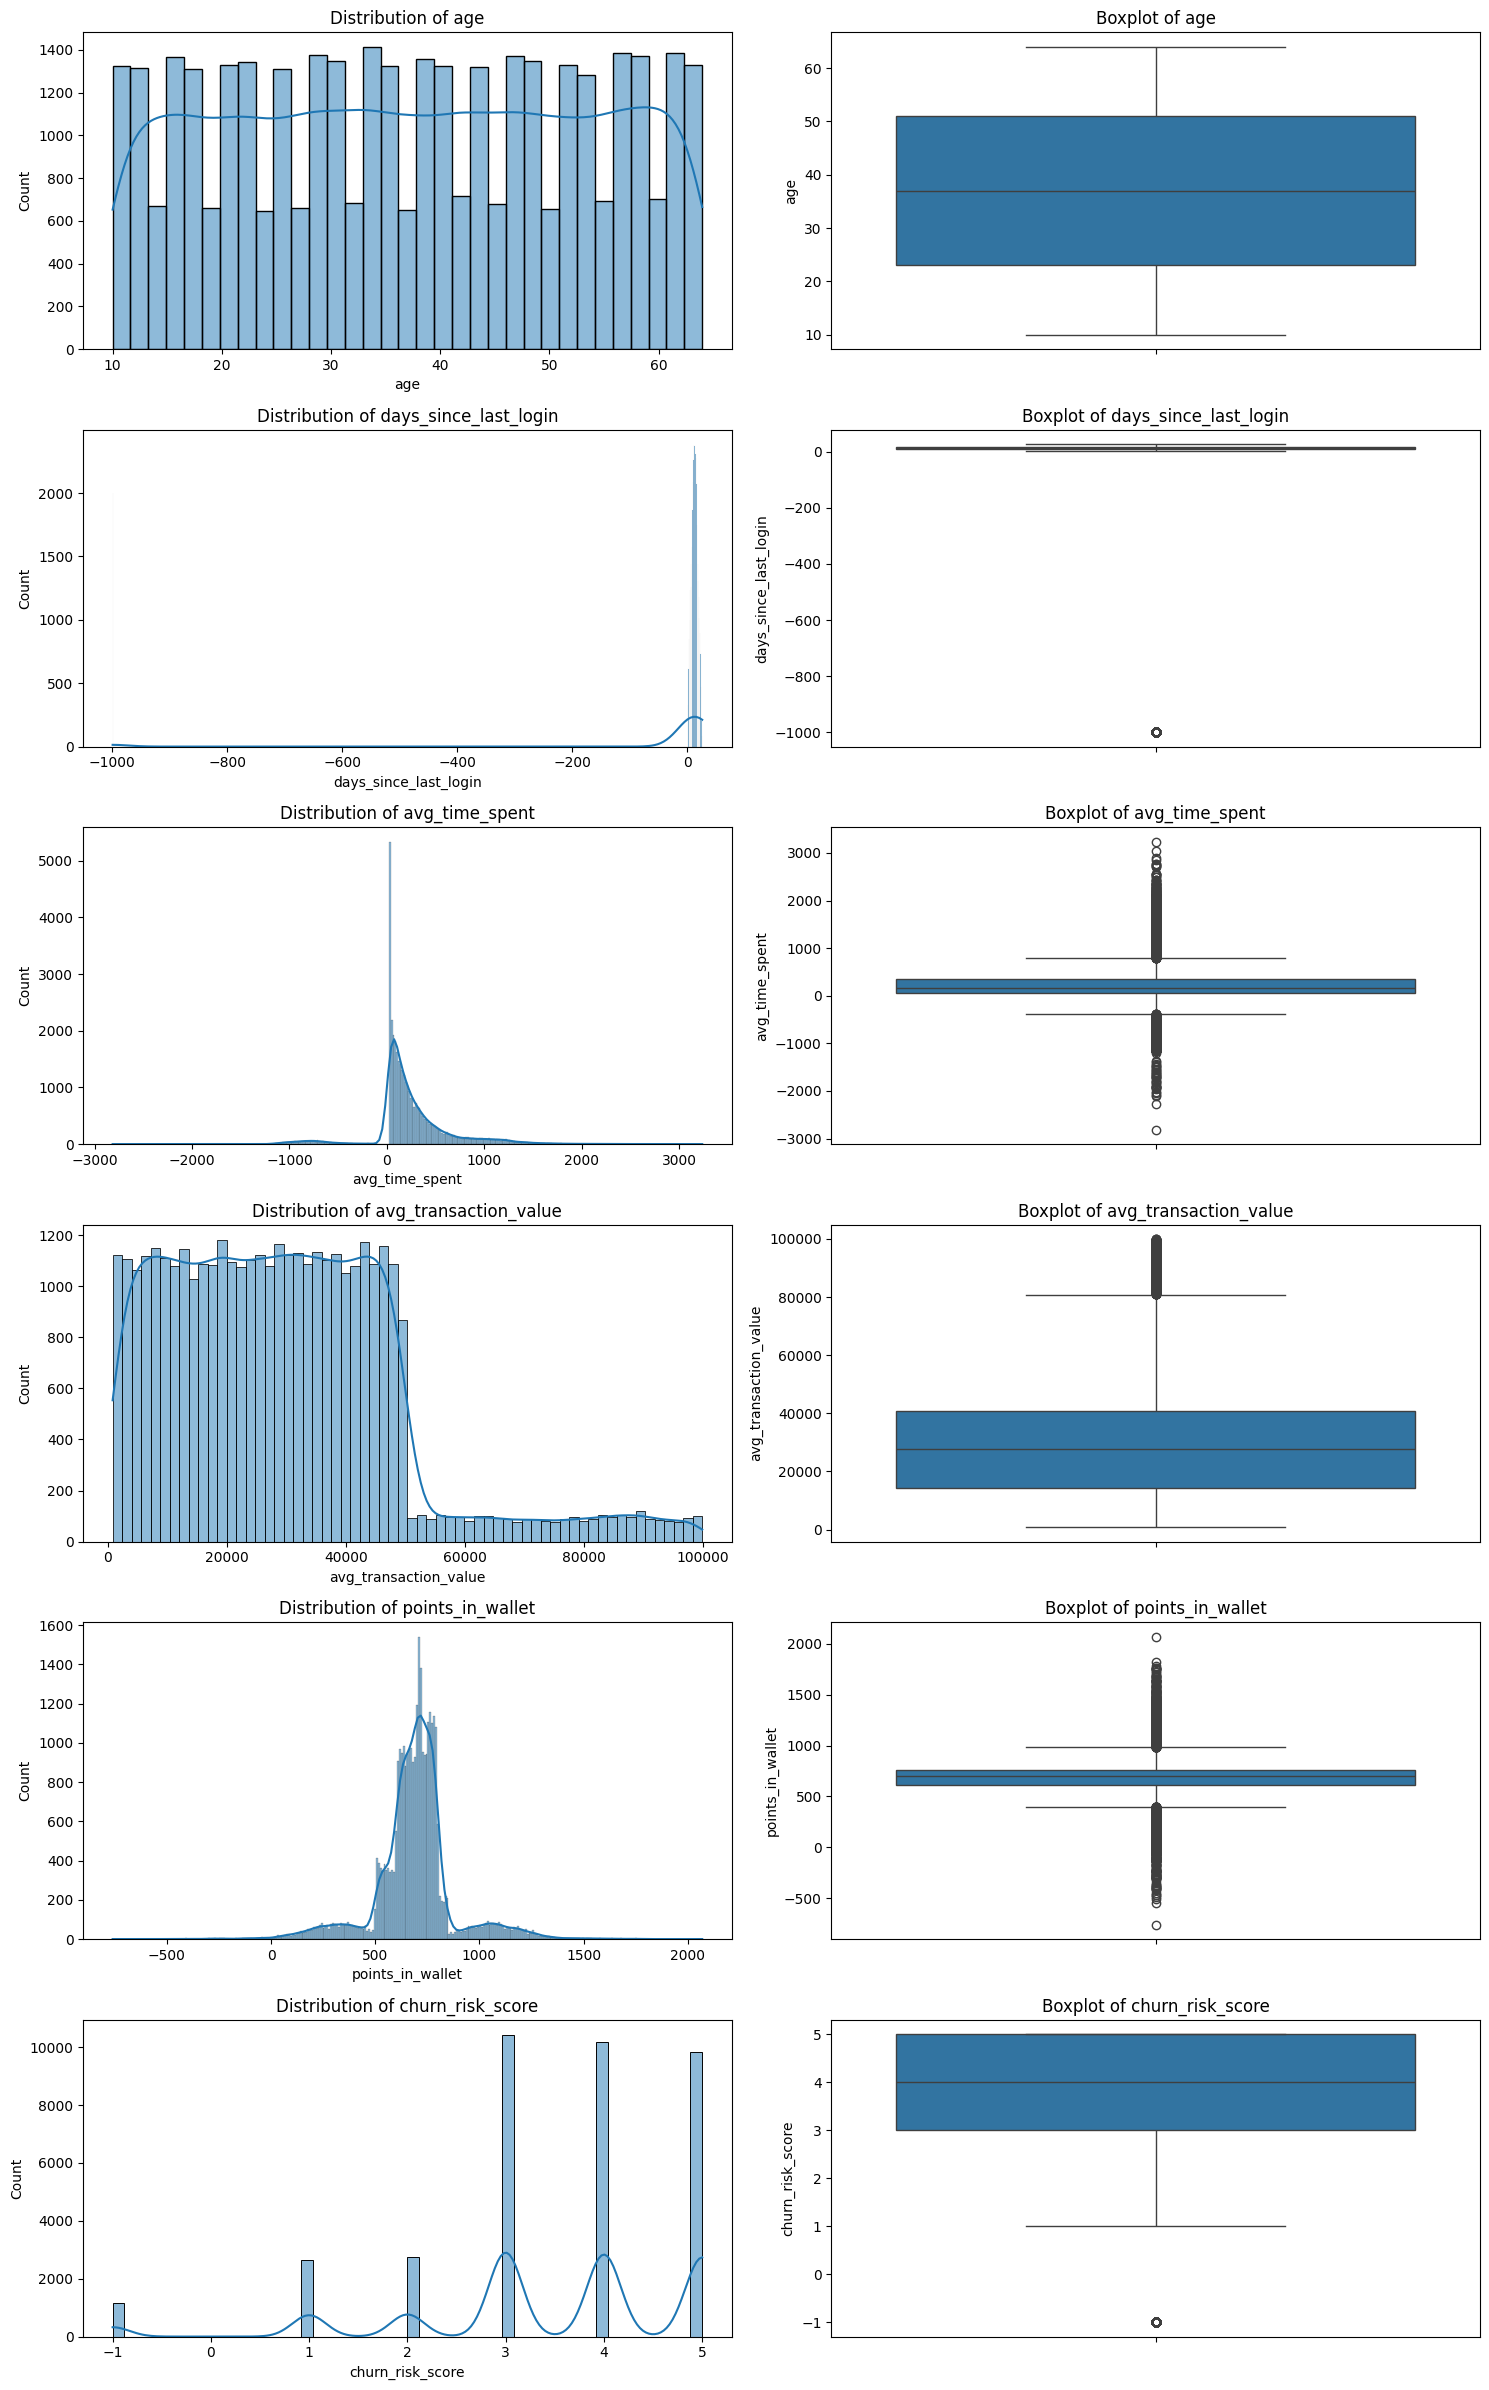

In [15]:

# Plot distributions
analyze_distributions(train_data)

# 3. Bias Analysis

Document potential biases in the dataset:
- Selection bias: [Your analysis here]
- Measurement bias: [Your analysis here]
- Demographic representation: [Your analysis here]
- Time-related biases: [Your analysis here]


### Initial Assessment of the Dataset

Here are some key observations and potential biases:



### **1. Selection Bias**
- **Possible Issues**:
  - The column `region_category` indicates whether customers are from "Village," "City," or "Town." Missing values (`5428` out of `36992`) could mean certain regions are underrepresented, potentially skewing analysis.
  - If the dataset only includes customers with memberships (`membership_category`), non-members may be excluded, biasing insights.

- **My Potential Solution**:
  - Assess the proportion of missing `region_category` values.
  - Check if the dataset represents all desired regions evenly.



### **2. Measurement Bias**
- **Possible Issues**:
  - Columns like `days_since_last_login`, `avg_time_spent`, and `points_in_wallet` might have inaccuracies. Missing or incorrect entries (`points_in_wallet` has 3443 missing values) can distort results.
  - Self-reported columns, like `feedback`, may have subjective or inconsistent inputs.

- **My Potential Solution**:
  - Impute or drop missing values thoughtfully.
  



### **3. Demographic Representation Bias**
- **Possible Issues**:
  - `age` and `gender` could indicate skewed representation across age groups or genders. If one demographic dominates, the model may not generalize well to others.
  - Check if `region_category` and `membership_category` align with demographic diversity.

- **Solution**:
  - Analyze the distribution of `age`, `gender`, and `region_category` to ensure fair representation.

---

### **4. Time-Related Bias**
- **Possible Issues**:
  - `joining_date` and `last_visit_time` suggest temporal aspects. If data collection spans only certain time periods, conclusions may not generalize to other periods.
  - Seasonal or temporal patterns could influence customer behavior, such as average transaction values or churn risk.

- **Solution**:
  - Verify if data spans multiple years, seasons, or significant events.
  - Segment analysis by time to capture temporal variations.

---

### Next Steps
1. Analyze the distribution of key columns (`age`, `gender`, `region_category`, etc.) to detect representation bias.
2. Address missing values in columns like `region_category` and `points_in_wallet`.
3. Examine temporal coverage of the data in `joining_date` and `last_visit_time`.
4. Assess if feedback categories or churn scores exhibit potential skew.

Would you like me to dive deeper into specific columns or biases? I can also generate visualizations to provide a clearer view. Let me know!

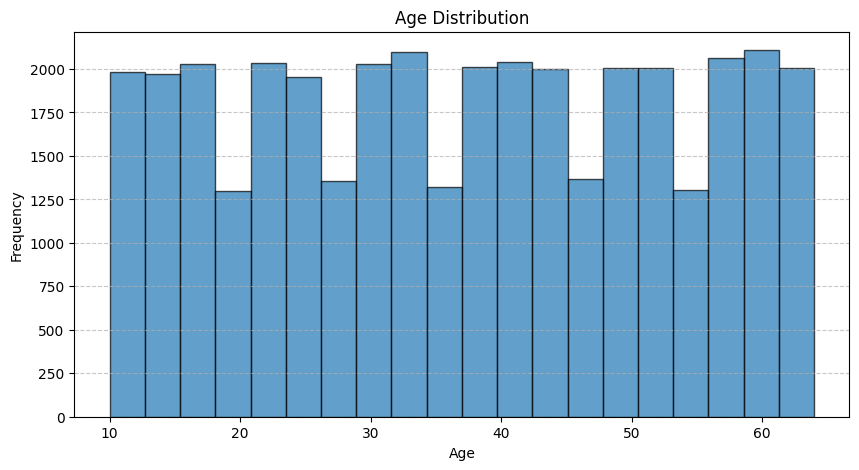

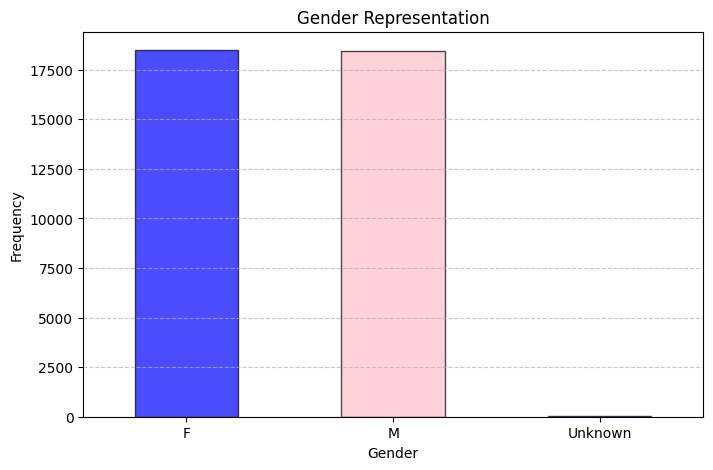

(count    36992.000000
 mean        37.118161
 std         15.867412
 min         10.000000
 25%         23.000000
 50%         37.000000
 75%         51.000000
 max         64.000000
 Name: age, dtype: float64,
 {'F': 18490, 'M': 18443, 'Unknown': 59})

In [43]:
# check bias on age and gender

# # Check age distribution
# plt.figure(figsize=(10, 5))
# plt.hist(train_data['age'], bins=20, edgecolor='black', alpha=0.7)
# plt.title('Age Distribution')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

# Check gender distribution
gender_counts = train_data['gender'].value_counts()
plt.figure(figsize=(8, 5))
gender_counts.plot(kind='bar', color=['blue', 'pink'], edgecolor='black', alpha=0.7)
plt.title('Gender Representation')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Provide numerical breakdown
# age_summary = train_data['age'].describe()
gender_summary = gender_counts.to_dict()

# age_summary,
gender_summary


In [3]:


def analyze_non_numeric_distributions(df):
    """
    Analyzes and plots distributions of non-numerical features
    :param df: DataFrame
    """
    numerical_cols = df.select_dtypes(exclude=['int64', 'float64']).columns

    plt.figure(figsize=(15, len(numerical_cols)*4))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(len(numerical_cols), 2, i*2-1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')

        plt.subplot(len(numerical_cols), 2, i*2)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()


In [5]:

excluded_columns = ['customer_id','security_no','last_visit_time','feedback']
non_numerical_cols = train_data.select_dtypes(exclude=['int64', 'float64']).columns
filtered_columns = [col for col in non_numerical_cols if col not in excluded_columns]
filtered_data = train_data[filtered_columns]

In [6]:
def analyze_non_numeric_distributions(df):
    """
    Analyzes and plots distributions of non-numerical features

    Parameters:
    df (pandas.DataFrame): Input DataFrame
    """
    # Select non-numeric columns (categorical)
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    if len(categorical_cols) == 0:
        print("No categorical columns found in the dataset.")
        return

    # Create subplots for each categorical column
    plt.figure(figsize=(15, 5*len(categorical_cols)))

    for i, col in enumerate(categorical_cols, 1):
        # Get value counts and calculate percentages
        value_counts = df[col].value_counts()
        value_percentages = df[col].value_counts(normalize=True) * 100

        # Create subplot for bar plot
        plt.subplot(len(categorical_cols), 2, i*2-1)
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Count')

        # Add percentage labels on top of bars - CORRECTED THIS PART
        for idx, (j, v) in enumerate(zip(value_counts.index, value_counts.values)):
            plt.text(idx, v, f'{value_percentages.iloc[idx]:.1f}%',
                    ha='center', va='bottom')

        # Create subplot for pie chart
        plt.subplot(len(categorical_cols), 2, i*2)
        plt.pie(value_counts.values, labels=value_counts.index,
                autopct='%1.1f%%', startangle=90)
        plt.title(f'Percentage Distribution of {col}')

        # Print summary statistics
        print(f"\nSummary for {col}:")
        print("-" * 50)
        print(f"Number of unique values: {df[col].nunique()}")
        print(f"Most common value: {df[col].mode().iloc[0]} ({value_percentages.iloc[0]:.1f}%)")
        print(f"Missing values: {df[col].isnull().sum()} ({(df[col].isnull().sum()/len(df))*100:.1f}%)")
        print("\nValue Counts:")
        print(pd.DataFrame({
            'Count': value_counts,
            'Percentage': value_percentages
        }))

    plt.tight_layout()
    plt.show()

    # Additional analysis for high-cardinality categorical variables
    high_cardinality_cols = [col for col in categorical_cols
                            if df[col].nunique() > 10]
    if high_cardinality_cols:
        print("\nHigh Cardinality Columns Analysis:")
        print("-" * 50)
        for col in high_cardinality_cols:
            print(f"\n{col}:")
            print(f"Number of unique values: {df[col].nunique()}")
            print("Top 10 most frequent values:")
            print(df[col].value_counts().head(10))



def check_cardinality(df):
    """
    Checks cardinality of categorical columns
    """
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    cardinality = pd.DataFrame({
        'nunique': df[categorical_cols].nunique(),
        'percent_unique': df[categorical_cols].nunique() / len(df) * 100
    }).sort_values('nunique', ascending=False)

    return cardinality



def analyze_categorical_relationships(df, target_col):
    """
    Analyzes relationships between categorical variables and target
    """
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    categorical_cols = [col for col in categorical_cols if col != target_col]

    for col in categorical_cols:
        plt.figure(figsize=(10, 6))
        pd.crosstab(df[col], df[target_col], normalize='index').plot(kind='bar')
        plt.title(f'{col} vs {target_col}')
        plt.xlabel(col)
        plt.ylabel(f'Proportion of {target_col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [5]:
excluded_columns = ['customer_id','security_no', 'Name']
filtered_columns = [col for col in train_data if col not in excluded_columns]

In [ ]:
analyze_non_numeric_distributions(train_data)

In [ ]:
for col in non_numerical_cols:
    print(f"Column: {col}")
    print(train_data[col].value_counts())
    print("\n")


# 4. Feature Engineering

In [38]:


def engineer_features(df):
    """
    Creates new features based on existing data
    :param df: DataFrame
    :return: DataFrame with new features
    """
    df_processed = df.copy()

    # Example feature engineering (modify based on your specific needs):

    # 4.1 Time-based features
    if 'last_login' in df.columns:
        df_processed['days_since_login'] = (pd.to_datetime('now') - pd.to_datetime(df['last_login'])).dt.days

    # 4.2 Interaction features
    if 'visit_frequency' in df.columns and 'duration' in df.columns:
        df_processed['engagement_score'] = df['visit_frequency'] * df['duration']

    # 4.3 Categorical encoding
    # Add your categorical encoding logic here

    return df_processed

# Apply feature engineering
train_data_processed = engineer_features(train_data)
test_data_processed = engineer_features(test_data)



# 5. Data Preprocessing
* Handles missing values
* Scales numerical features
* Encodes categorical variables

In [39]:

def preprocess_data(df):
    """
    Applies all preprocessing steps:
    - Handles missing values
    - Scales numerical features
    - Encodes categorical variables
    :param df: DataFrame
    :returns: preprocessed DataFrame
    """
    df_processed = df.copy()

    # 5.1 Handle missing values
    # Add your missing value handling logic here

    # 5.2 Scale numerical features
    scaler = StandardScaler()
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])

    # 5.3 Additional preprocessing steps
    # Add any additional preprocessing steps here

    return df_processed

# Apply preprocessing
train_data_final = preprocess_data(train_data_processed)
test_data_final = preprocess_data(test_data_processed)



# 6. Save Processed Data
# Save the processed datasets

In [35]:

train_data_final.to_csv('processed_train.csv', index=False)
test_data_final.to_csv('processed_test.csv', index=False)



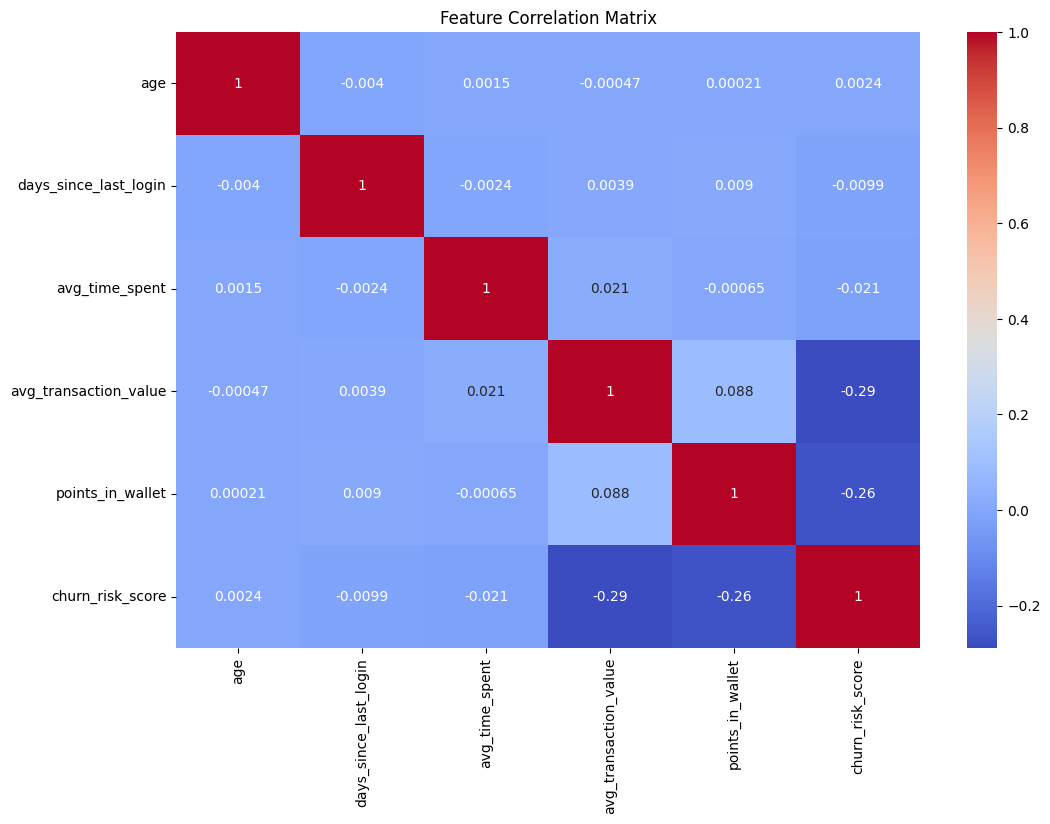

'\nFinal Notes and Observations:\n\n1. Data Quality:\n   - [Document your findings about data quality]\n   - [Note any concerning patterns or issues]\n\n2. Feature Engineering Decisions:\n   - [Document why you created each new feature]\n   - [Explain the expected impact on the model]\n\n3. Preprocessing Decisions:\n   - [Explain your choice of scaling methods]\n   - [Document handling of outliers]\n   - [Explain treatment of missing values]\n\n4. Next Steps:\n   - [List any additional analyses needed]\n   - [Note potential model considerations based on this analysis]\n   '

In [37]:
# 7. Correlation Analysis
plt.figure(figsize=(12, 8))

# Select only numerical features for correlation analysis
numerical_features = train_data_final.select_dtypes(include=['number']).columns
sns.heatmap(train_data_final[numerical_features].corr(), annot=True, cmap='coolwarm')


plt.title('Feature Correlation Matrix')
plt.show()




## Final Notes and Observations:

1. Data Quality:
   - [Document your findings about data quality]
   - [Note any concerning patterns or issues]

2. Feature Engineering Decisions:
   - [Document why you created each new feature]
   - [Explain the expected impact on the model]

3. Preprocessing Decisions:
   - [Explain your choice of scaling methods]
   - [Document handling of outliers]
   - [Explain treatment of missing values]

4. Next Steps:
   - [List any additional analyses needed]
   - [Note potential model considerations based on this analysis]
   